<a href="https://colab.research.google.com/github/carmenscar/Mind_lab_data/blob/master/analisecovidbsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


#Análise dos dados - COVID - Brasília
**ÚLTIMA ATUALIZAÇÃO 19/08/2020**

O Distrito Federal foi um dos entes da federação que começaram cedo com as medidas de isolamento social. 

Passados 4 meses desde o primeiro caso de covid na capital, em agosto, Brasília tem forte queda nas taxas de isolamento social.

O governo julga seguro a retomada das atividades e está gradativamente liberando a reabertura, com algumas restrições, do comércio essencial, dos parques, dos clubes e das igrejas, deixando por último a reabertura de bares, restaurantes e academias, consideradas atividades não essenciais.

Diante do cenário, analisaremos os dados sobre o **corona vírus** e veremos quais informações podemos extrair dos dados brutos disponibilizados pelo governo do Distrito Federal.

O estudo será atualizado semanalmente.


##Obtenção de dados
Os utilizados na presente análise foram extraídos do [site do GDF](https://covid19.ssp.df.gov.br/extensions/covid19/covid19.html#/) destinado às informações referentes ao **COVID**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime as dt

%matplotlib inline

In [ ]:
df = pd.read_excel('/content/dados-abertos.xlsx')

## Dicionário de variáveis
* id - número gerado para identificar o paciente
* Sexo - gênero do paciente
* Faixa etária - faixa de idade do paciente
* Estado de saúde - estado que se encontra o paciente identificado
* Comorbidade - identifica se o paciente possui comorbidades
* RA - Região Administrativa
* Data - data de importação dos dados
* Data Cadastro - data do cadastramento ou atualização dos dados do paciente
* dataPrimeirosintoma - Data que o paciente apresentou o primeiro sintoma da doença.

Dentre as comorbidades, são identificadas em variáveis separadas: Pneumopatia, Nefropatia, Doença Hematológica, Distúrbios metabólicos, Imunopressão, Obesidade, Cardiovasculopatia e Outros.

### A seguir, observemos um pedaço-resumo do dataframe, analisando as 5 primeiras entradas:

In [ ]:
df.head(5)

,Data,Data Cadastro,Sexo,Faixa Etária,RA,UF,Óbito,dataPrimeirosintomas,Comorbidade,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunossupressão,Obesidade,Outros,Cardiovasculopatia
0,2020-08-19,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-19,2020-03-18,Masculino,40 a 49 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-19,2020-03-18,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Não,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-19,2020-03-18,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Não,2020-03-14,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim
4,2020-08-19,2020-03-18,Feminino,20 a 29 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visão geral dos dados

Os dados possuem 141.762 entradas e 17 variáveis.
Quando observamos os dados da tabela verificamos que existem campos para diferentes comorbidades. 

Para facilitar a análise, criamos uma entrada denominada "Comorbidade" que aponta se há ou não qualquer tipo de comorbidade apresentada pelo paciente, ou se o valor não foi informado.

Todas as variáveis, com exceção das datas, são do tipo "object", ou seja, do tipo string.



In [ ]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	 141762
Variáveis:	 17



Data                      datetime64[ns]
Data Cadastro             datetime64[ns]
Sexo                              object
Faixa Etária                      object
RA                                object
UF                                object
Óbito                             object
dataPrimeirosintomas      datetime64[ns]
Comorbidade                       object
Pneumopatia                       object
Nefropatia                        object
Doença Hematológica               object
Distúrbios Metabólicos            object
Imunossupressão                   object
Obesidade                         object
Outros                            object
Cardiovasculopatia                object
dtype: object

## Nulls
A maior parte dos valores em branco se relacionam com as informações sobre Comorbidades do paciente. Observa-se que quando há uma comorbidade, as outras comorbidades listadas são, geralmente, preenchidas com "sim" ou "não", e na maioria dos casos(91%), não é informado se há ou não comorbidades.

Uma hipótese é a de que quando registrada uma comorbidade, se avaliam as outras e se não há comorbidade, os valores ficam em branco.

Em relação as informações sobre o estado de saúde do paciente, apesar de não conter valores nulos, a maior parte do valor é dado como "não informado".

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Doença Hematológica       0.997192
Nefropatia                0.993644
Obesidade                 0.993059
Imunossupressão           0.991514
Pneumopatia               0.983754
Distúrbios Metabólicos    0.968715
Cardiovasculopatia        0.954261
Outros                    0.913750
Comorbidade               0.913750
UF                        0.025113
Data Cadastro             0.000360
dataPrimeirosintomas      0.000000
Óbito                     0.000000
RA                        0.000000
Faixa Etária              0.000000
Sexo                      0.000000
Data                      0.000000
dtype: float64

## Análise exploratória dos dados

### Regiões do DF
Ceilândia é a cidade com mais casos de corona vírus, representando aproximadamente 12% dos pacientes diagnosticados. A Região administrativa é seguida em maiores números de casos pelo Plano Piloto,Taguatinga, com aproximadamente 8% e 7% dos casos, respectivamente.

As regiões do Pôr do Sol, Candangolândia, Sobradinho II,  Arniqueira, Varjão, SIA e Fercal representam os locais com menos casos. 

Observa-se que dado ao fato das regiões estarem predominantemente classificadas como regiões de baixa renda, segundo dados da Codeplan 2018, pode haver subnotificação de casos.

Segundos os dados da Codeplan(2018), as regiões de classificam da seguinte maneira:

• **Grupo 1 (alta renda)**: Plano Piloto, Jardim Botânico, Lago Norte, Lago Sul, Park Way e Sudoeste/Octogonal, com renda domiciliar de R$ 15.622

• **Grupo 2 (média-alta renda)**: Águas Claras, Candangolândia, Cruzeiro, Gama, Guará, Núcleo
Bandeirante, Sobradinho, Sobradinho II, Taguatinga e Vicente Pires, com renda domiciliar média de R$ 7.266;

• **Grupo 3 (média-baixa renda)**: Brazlândia, Ceilândia, Planaltina, Riacho Fundo, Riacho Fundo
II, SIA, Samambaia, Santa Maria e São Sebastião, com renda domiciliar média de R$ 3.101;

• **Grupo 4 (baixa renda)**: Fercal, Itapoã, Paranoá, Recanto das Emas, SCIA–Estrutural e Varjão, com renda domiciliar média de R$
2.472;



In [ ]:
df.RA.value_counts() / df.shape[0]


Ceilândia                0.119094
Plano Piloto             0.081199
Taguatinga               0.076396
Outros Estados           0.074533
Não Informado            0.067726
Samambaia                0.062619
Gama                     0.047947
Águas Claras             0.044532
Guará                    0.042437
Sobradinho               0.036202
Planaltina               0.033048
Santa Maria              0.031750
São Sebastião            0.026643
Recanto das Emas         0.026601
Paranoá                  0.023589
Entorno DF               0.019878
Sudoeste/Octogonal       0.017628
Vicente Pires            0.016231
Riacho Fundo             0.016217
Lago Sul                 0.013727
Brazlândia               0.013191
Sistema Penitenciário    0.012479
Riacho Fundo II          0.011752
Itapoã                   0.011696
Jardim Botânico          0.009890
Lago Norte               0.009262
Cruzeiro                 0.009043
Núcleo Bandeirante       0.008077
SCIA                     0.007019
Park Way      

###Gênero
Em relação ao gênero dos paciêntes com Covid, observa-se que não há diferença de gênero em relação a quantidade de infectados, sendo aproximadamente 53% dos infectadosdo sexo feminino e 47% do sexo masculino, conforme o Gráfico 1.

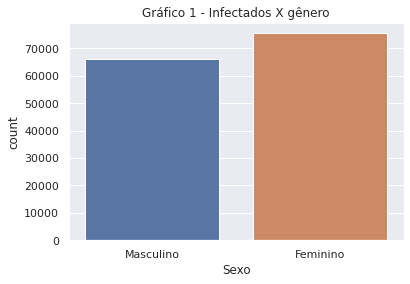

Feminino     0.532858
Masculino    0.467142
Name: Sexo, dtype: float64

In [ ]:
sns.set()
sns.countplot(df['Sexo'])
plt.title('Gráfico 1 - Infectados X gênero')
plt.show()
df.Sexo.value_counts() / df.shape[0]

##Faixa Etária
A análise da faixa etária nos demonstra que há menor número de casos notificados entre os menores de 19 anos e maiores de 60 anos. Portanto, o maior número de infecções fica por dentro dessa faixa etária, conforme observado no Gráfico 2.


30 a 39 anos    0.268781
40 a 49 anos    0.222387
20 a 29 anos    0.184302
50 a 59 anos    0.138521
>= 60 anos      0.115511
<= 19 anos      0.070498
Name: Faixa Etária, dtype: float64

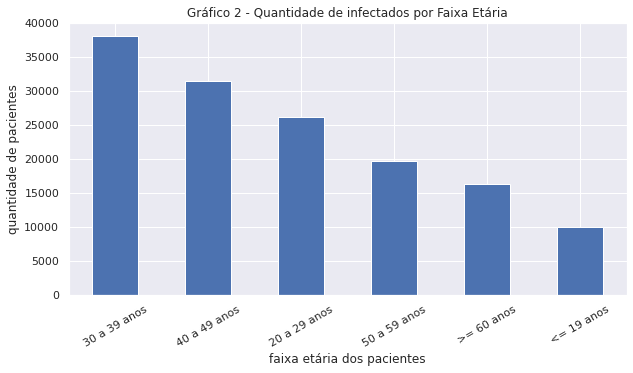

In [ ]:

sns.set()
plt.figure(figsize=(10,5))
df['Faixa Etária'].value_counts().plot(kind='bar')
plt.xlabel('faixa etária dos pacientes')
plt.ylabel('quantidade de pacientes')
plt.title('Gráfico 2 - Quantidade de infectados por Faixa Etária')
plt.xticks(rotation=30)
df['Faixa Etária'].value_counts() / df.shape[0]


##Estado de saúde
No decorrer da análise, a estrutura disponibilizada pelo governo do GDF foi alterada. 
Havia uma variável chamada "Estado de Saúde", que mostrava se havia óbito ou se o paciente estava recuperado. Dessa variável, 20% dos valores não eram informados.

O novo dataframe veio com uma coluna chamada "Óbito", não havendo mais a separação por estado de saúde (recuperado ou óbito).

Além disso, houve a inclusão da variável "Dia dos primeiros sintomas".


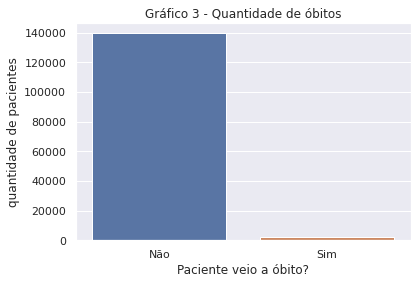

In [ ]:
sns.set()
sns.countplot(df['Óbito'])
plt.xlabel('Paciente veio a óbito?')
plt.ylabel('quantidade de pacientes')
plt.title('Gráfico 3 - Quantidade de óbitos')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['Óbito'].value_counts() / df['Óbito'].shape[0]

Não    0.984848
Sim    0.015152
Name: Óbito, dtype: float64

##Óbitos
Observa-se que o número de óbitos é maior no sexo masculino, representando 1.278 óbitos de homens (59%) de 2.148 óbitos, em 19 de agosto,apesar das mulheres serem 53% dos pacientes infectados, ou seja, mesmo havendo um maior número de mulheres infectadas quando comparado ao número de homens infectados, estes vêm mais a óbito.

No gráfico de faixa etária do sexo masculino, há um menor número de homens com idade entre >= 60 anos quando comparado ao número de mulheres, aproximadamente 70% do total. As mulheres nessa faixa etária representam 77% total, conforme evidenciado nos Gráficos 4 e 5.

Dessa forma, os homens mesmo sendo mais jovens, vêm mais à óbito, representando 59% do total de óbitos. Essa situação merece uma maior investigação.

Observa-se também que apesar dos idosos (pacientes > 60 anos) serem apenas 11% dos pacientes infectados(Gráfico 2), estes representam aproximadamente 73% dos óbitos, mostrando que há um **alto risco de mortalidade** nessa faixa etária, conforme evidenciado no Gráfico 6.

In [ ]:
df1 = df[df["Óbito"] == "Sim"]

In [ ]:
df1.Sexo.value_counts()

Masculino    1278
Feminino      870
Name: Sexo, dtype: int64

In [ ]:
df1.Sexo.value_counts() / df1.Sexo.shape[0]

Masculino    0.594972
Feminino     0.405028
Name: Sexo, dtype: float64

In [ ]:
df9 = df1[df1["Sexo"] == "Feminino"]

In [ ]:
df9['Faixa Etária'].value_counts() / df9['Faixa Etária'].shape[0]

>= 60 anos      0.770115
50 a 59 anos    0.118391
40 a 49 anos    0.063218
30 a 39 anos    0.032184
20 a 29 anos    0.011494
<= 19 anos      0.004598
Name: Faixa Etária, dtype: float64

In [ ]:
df10 = df1[df1["Sexo"] == "Masculino"]
df10['Faixa Etária'].value_counts() / df10['Faixa Etária'].shape[0]

>= 60 anos      0.703443
50 a 59 anos    0.154147
40 a 49 anos    0.093897
30 a 39 anos    0.037559
20 a 29 anos    0.010172
<= 19 anos      0.000782
Name: Faixa Etária, dtype: float64

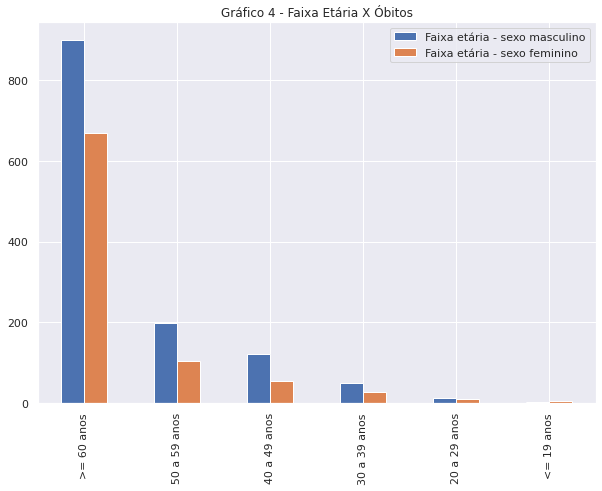

In [ ]:
graf7 = pd.concat([(df10['Faixa Etária']).value_counts(), (df9['Faixa Etária']).value_counts()],axis=1).plot.bar(figsize=(10,7))
graf7.legend(["Faixa etária - sexo masculino", "Faixa etária - sexo feminino"])
graf7.set_title('Gráfico 4 - Faixa Etária X Óbitos');

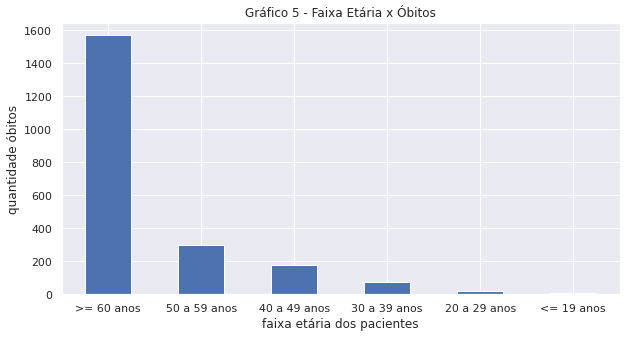

In [ ]:
sns.set()
plt.figure(figsize=(10,5))
df1['Faixa Etária'].value_counts().plot(kind='bar')
plt.xlabel('faixa etária dos pacientes')
plt.ylabel('quantidade óbitos')
plt.title('Gráfico 5 - Faixa Etária x Óbitos');
plt.xticks(rotation=0)
df1['Faixa Etária'].value_counts() / df1['Faixa Etária'].shape[0]
plt.show()

In [ ]:
df1['Faixa Etária'].value_counts() / df1['Faixa Etária'].shape[0]

>= 60 anos      0.730447
50 a 59 anos    0.139665
40 a 49 anos    0.081471
30 a 39 anos    0.035382
20 a 29 anos    0.010708
<= 19 anos      0.002328
Name: Faixa Etária, dtype: float64

##Comorbidades X Óbitos
Em relação aos óbitos, o Gráfico 7 demonstra que aproximadamente 85% dos pacientes que vieram a falecer possuiam algum tipo de comorbidade.

A análise ainda mostra que a maioria sofria das comorbidades do tipo "Distúrbios Metabólicos" e "Cardiovasculopatia",  conforme observado no Gráfico 8.

Cumpre destacar que esses pacientes podiam possuir 1 ou mais tipos de comorbidades.

In [ ]:
df2 = df1[df1["Comorbidade"] == "Sim"]

In [ ]:
df12 = df1
df12['Comorbidade'].fillna("Não Informado", inplace=True);

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
df12['Comorbidade'].value_counts()


Sim              1838
Não Informado     310
Name: Comorbidade, dtype: int64

In [ ]:
df12['Comorbidade'].value_counts() / df12['Comorbidade'].shape[0]

Sim              0.85568
Não Informado    0.14432
Name: Comorbidade, dtype: float64

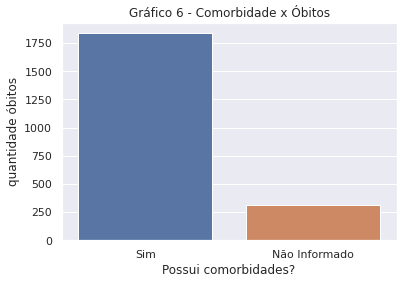

Sim              0.85568
Não Informado    0.14432
Name: Comorbidade, dtype: float64

In [ ]:
sns.set()
sns.countplot(df12['Comorbidade'])
plt.xlabel('Possui comorbidades?')
plt.ylabel('quantidade óbitos')
plt.title('Gráfico 6 - Comorbidade x Óbitos')
plt.show();
df12.Comorbidade.value_counts()/df12.Comorbidade.shape[0]


In [ ]:
df3 = ((df12.iloc[:,8:]).fillna("Não"))

In [ ]:
df3 = df3.replace(["Sim"],1)

In [ ]:
df3 = df3.replace(['Não'], 0)

In [ ]:
df3 = df3.replace(['Não Informado'], 0)

In [ ]:
df3.sum()

Comorbidade               1838
Pneumopatia                276
Nefropatia                 198
Doença Hematológica         12
Distúrbios Metabólicos     871
Imunossupressão            173
Obesidade                  241
Outros                     290
Cardiovasculopatia        1320
dtype: int64

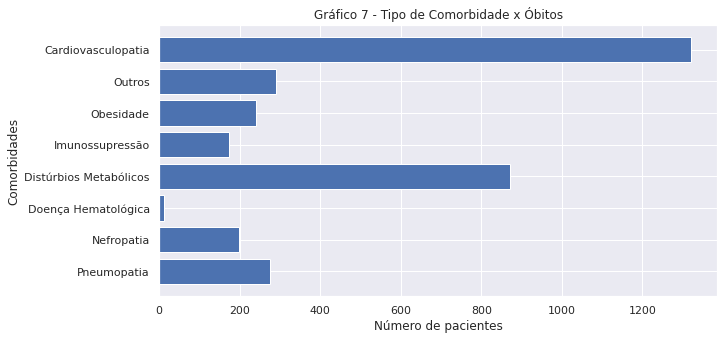

In [ ]:
disease = ['Pneumopatia', 'Nefropatia', 'Doença Hematológica',
       'Distúrbios Metabólicos', 'Imunossupressão', 'Obesidade', 'Outros',
       'Cardiovasculopatia']
n_disease = [276,198,12,871,173,241,290,1320]

sns.set()
plt.figure(figsize=(10,5))
plt.barh(disease, n_disease);
plt.xlabel('Número de pacientes')
plt.ylabel('Comorbidades')
plt.title('Gráfico 7 - Tipo de Comorbidade x Óbitos');

##Análise temporal

Em relação a quantidade de infectados, a análise dos dados sugere ainda uma tendência de crescimento, concomitante com o crescimento de óbitos, conforme evidenciado nos Gráficos 9 e 10.



In [ ]:
df8 = df

In [ ]:
df8['Pacientes'] = 1

In [ ]:
df8['Mês'] = df8['Data'].dt.month

In [ ]:
df8.index = df8['Data Cadastro']

2020-08-10    3073
2020-07-06    2847
2020-06-29    2816
2020-07-23    2655
2020-06-28    2528
              ... 
2020-04-14      10
2020-04-08       8
2020-03-01       1
2020-03-16       1
2020-03-17       1
Name: Data Cadastro, Length: 158, dtype: int64

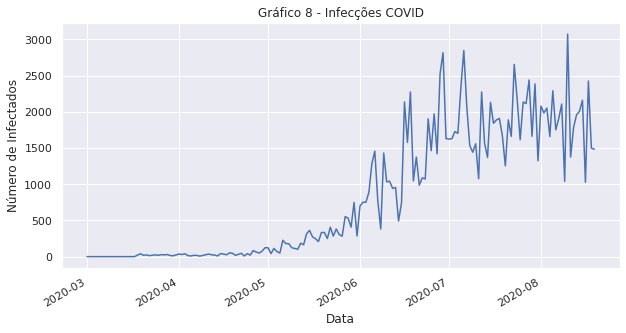

In [ ]:
sns.set()
plt.figure(figsize=(10,5))
df8['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de Infectados")
plt.title('Gráfico 8 - Infecções COVID')
df8['Data Cadastro'].value_counts() 

2020-07-07    69
2020-07-23    48
2020-07-30    48
2020-07-20    48
2020-08-08    44
              ..
2020-04-13     1
2020-03-28     1
2020-05-01     1
2020-05-12     1
2020-04-19     1
Name: Data Cadastro, Length: 130, dtype: int64

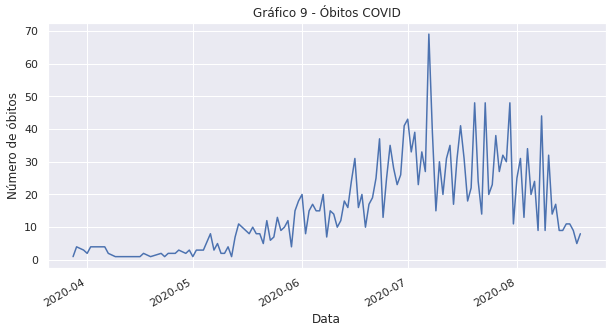

In [ ]:
sns.set()
plt.figure(figsize=(10,5))
df1['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de óbitos")
plt.title('Gráfico 9 - Óbitos COVID')
df1['Data Cadastro'].value_counts() 


In [51]:
df1["Óbito"].value_counts()

Sim    2148
Name: Óbito, dtype: int64

##Conclusões
No recente cenário de pandemia mundial, Brasília também se encontra em número crescente de infectados e óbitos.

Nesse estudo, observamos que o número de óbitos é maior entre os que possuem comorbidades (85%) e apesar do fato de a faixa Etária dos infectados com idade acima de 60 anos representar 11% dos infectados totais, eles representam 73% dos óbitos.

Também observou-se que apesar dos números de infectados serem semelhantes entre homens e mulheres, os homens vão mais a óbito, representando 59% dos falecimentos.

Dentre as comorbidades que estão mais relacionadas com os óbitos estão a Cardiovasculopatia e os Distúrbios Metabólicos. O total de óbitos chega a 2.148.

Cumpre salientar que no antigo dataframe disponibilizado pelo GDF havia a variável "Estados de saúde"  com 20% dos valores não informados. No dataframe atual, foi incluído a variável 'óbito' e 'dia dos primeiros sintomas'.

Este estudo demonstra algumas análises que se pode extrair dos dados brutos abertos disponibilizados pelo Governo do Distrito Federal.

Esse estudo será atualizado semanalmente.

Carmen Scartezini, Accountant & Data Analyst.